In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import neattext.functions as nfx

In [3]:
pip install eli5 lime neattext altair streamlit


  Using cached eli5-0.11.0-py2.py3-none-any.whl (106 kB)
  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Using cached neattext-0.1.3-py3-none-any.whl (114 kB)
  Using cached altair-4.2.0-py3-none-any.whl (812 kB)
  Using cached streamlit-1.8.1-py2.py3-none-any.whl (10.1 MB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached tzlocal-4.2-py3-none-any.whl (19 kB)
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)

  Using cached validators-0.18.2-py3-none-any.whl (19 kB)

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\backports\\__init__.py'
Consider using the `--user` option or check the permissions.




  Using cached backports.zoneinfo-0.2.1-cp38-cp38-win_amd64.whl (38 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=57a49d2a1088fa93322be703da60a1de008b8f76ccac22aea12fc8924eb60749
  Stored in directory: c:\users\dhruv garg\appdata\local\pip\cache\wheels\e6\a6\20\cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [7]:
from sklearn.feature_extraction.text import CountVectorizer 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
df=pd.read_csv("emotion_dataset_2.csv")

In [29]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [30]:
df.columns

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')

In [14]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

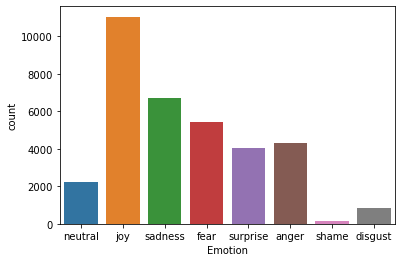

In [15]:
sns.countplot(x="Emotion",data=df)

In [31]:
df['Clean_text']=df['Text'].apply(nfx.remove_userhandles)
df['Clean_text']=df['Clean_text'].apply(nfx.remove_stopwords)

In [32]:
df.drop(columns="Clean_Text",axis=1,inplace=True)

In [26]:
#df['Clean_text']=df['Clean_text'].apply(nfx.remove_special_characters)

In [33]:
df

,Unnamed: 0,Emotion,Text,Clean_text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,34789,anger,A man robbed me today .,man robbed today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [34]:
Xfeatures=df['Clean_text']
ylabels=df['Emotion']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.33, random_state=42)

In [36]:
from sklearn.pipeline import Pipeline

In [38]:
pipe_lr=Pipeline(steps=[("cv",CountVectorizer()),("lr",LogisticRegression())])

In [39]:
pipe_lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [40]:
pipe_lr.score(X_test,y_test)

0.6199268420135865

In [41]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [50]:
ex1="This is not a bad "

In [51]:
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [53]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [54]:
import joblib
pipeline_file=open("emotion_classifier.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()